In [267]:
!pip install -q seaborn numpy pandas matplotlib scipy


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [268]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from scipy.constants import convert_temperature

from tensorflow import keras
from tensorflow.keras import layers

pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3, suppress=True)

In [382]:
# filepath = './Preprocessed_Data.csv'
# filepath = './Preprocessed_Data_wit_unknown_percentages.csv'
filepath = 'dbms_outpu.csv'
# column_names = ['date', 'bleaching_level', 'depth_meters', 'clim_SST', 'temperature_kelvin','temperature_mean','temperature_maximum','temperature_minimum','temperature_kelvin_standard_deviation',	'SSTA_standard_deviation','SSTA_mean','SSTA_minimum','SSTA_maximum','SSTA_frequency','SSTA_frequency_standard_deviation','SSTA_frequency_max','SSTA_frequency_mean','SSTA_DHW','SSTA_DHW_standard_deviation','SSTA_DHWMax','SSTA_DHW_mean','TSA','TSA_standard_deviation','TSA_minimum','TSA_maximum','TSA_mean','TSA_frequency','TSA_frequency_standard_deviation','TSA_frequency_max','TSA_frequency_mean','TSA_DHW','TSA_DHW_standard_deviation','TSA_DHW_max','TSA_DHW_mean','severity_code']
schema = {'percent_bleached': float, 'date': str, 'year': int,  'depth_meters': float, 'clim_SST': float, 'temperature_mean': float, 'SSTA_mean': float, 'SSTA_DHW':float, 'TSA':float, 'TSA_DHW':float, 'severity_code': str }
column_names = [ 'date', 'year', 'percent_bleached','depth_meters', 'clim_SST', 'temperature_mean', 'SSTA_mean', 'SSTA_DHW', 'TSA', 'TSA_DHW', 'severity_code']
raw_dataset = pd.read_csv(filepath, names=column_names,
                            dtype=schema, parse_dates=['date'],
                          na_values='', comment='\t',
                          sep=',', skipinitialspace=True)
raw_dataset

,date,year,percent_bleached,depth_meters,clim_SST,temperature_mean,SSTA_mean,SSTA_DHW,TSA,TSA_DHW,severity_code
0,2015-09-30,2015,78.00,4.9,299.33,299.860,0.0,8.800,-0.950,5.340,Severe (>50% Bleached)
1,2008-08-27,2008,42.00,6.8,301.67,299.840,0.0,0.000,-1.120,0.000,Moderate (11-50% Bleached)
2,2015-10-07,2015,100.00,4.0,298.32,299.650,0.0,10.590,-0.570,7.160,Severe (>50% Bleached)
3,2016-04-21,2016,50.00,3.0,262.15,301.284,0.0,7.304,0.754,6.304,Severe (>50% Bleached)
4,2016-04-19,2016,43.00,5.0,301.79,301.580,0.0,3.330,0.590,3.250,Severe (>50% Bleached)
...,...,...,...,...,...,...,...,...,...,...,...
7301,2016-08-19,2016,3.42,9.9,301.47,299.730,0.0,1.300,0.950,0.000,Mild (1-10% Bleached)
7302,2016-09-06,2016,17.29,11.8,300.84,299.690,0.0,4.370,-0.910,1.260,Moderate (11-50% Bleached)
7303,2016-09-06,2016,3.41,12.2,300.84,299.730,0.0,3.140,-0.860,1.020,Mild (1-10% Bleached)
7304,2016-09-14,2016,7.87,5.5,299.86,299.670,0.0,1.730,0.650,1.130,Mild (1-10% Bleached)


In [383]:
# dataset = raw_dataset.copy()
dataset = raw_dataset.filter(['year', 'percent_bleached', 'depth_meters', 'clim_SST', 'temperature_mean', 'SSTA_mean', 'SSTA_DHW', 'TSA', 'TSA_DHW', 'severity_code'], axis=1)
dataset

,year,percent_bleached,depth_meters,clim_SST,temperature_mean,SSTA_mean,SSTA_DHW,TSA,TSA_DHW,severity_code
0,2015,78.00,4.9,299.33,299.860,0.0,8.800,-0.950,5.340,Severe (>50% Bleached)
1,2008,42.00,6.8,301.67,299.840,0.0,0.000,-1.120,0.000,Moderate (11-50% Bleached)
2,2015,100.00,4.0,298.32,299.650,0.0,10.590,-0.570,7.160,Severe (>50% Bleached)
3,2016,50.00,3.0,262.15,301.284,0.0,7.304,0.754,6.304,Severe (>50% Bleached)
4,2016,43.00,5.0,301.79,301.580,0.0,3.330,0.590,3.250,Severe (>50% Bleached)
...,...,...,...,...,...,...,...,...,...,...
7301,2016,3.42,9.9,301.47,299.730,0.0,1.300,0.950,0.000,Mild (1-10% Bleached)
7302,2016,17.29,11.8,300.84,299.690,0.0,4.370,-0.910,1.260,Moderate (11-50% Bleached)
7303,2016,3.41,12.2,300.84,299.730,0.0,3.140,-0.860,1.020,Mild (1-10% Bleached)
7304,2016,7.87,5.5,299.86,299.670,0.0,1.730,0.650,1.130,Mild (1-10% Bleached)


In [384]:
# dataset = pd.get_dummies(dataset, columns=['bleaching_level'], prefix='', prefix_sep='')
# dataset = pd.get_dummies(dataset, columns=['severity_code'], prefix='', prefix_sep='')
dataset.severity_code = dataset['severity_code'].map({'No Bleaching':0, '% unknown': 1, 'Mild (1-10% Bleached)': 1, 'Moderate (11-50% Bleached)': 2, 'Severe (>50% Bleached)': 3})
# dataset = pd.get_dummies(dataset, columns=['bleaching_level'], prefix='', prefix_sep='')

# dataset.bleaching_level = dataset['bleaching_level'].map({'NaN': 0, 'Colony': 1, 'Population': 2 })

dataset

,year,percent_bleached,depth_meters,clim_SST,temperature_mean,SSTA_mean,SSTA_DHW,TSA,TSA_DHW,severity_code
0,2015,78.00,4.9,299.33,299.860,0.0,8.800,-0.950,5.340,3
1,2008,42.00,6.8,301.67,299.840,0.0,0.000,-1.120,0.000,2
2,2015,100.00,4.0,298.32,299.650,0.0,10.590,-0.570,7.160,3
3,2016,50.00,3.0,262.15,301.284,0.0,7.304,0.754,6.304,3
4,2016,43.00,5.0,301.79,301.580,0.0,3.330,0.590,3.250,3
...,...,...,...,...,...,...,...,...,...,...
7301,2016,3.42,9.9,301.47,299.730,0.0,1.300,0.950,0.000,1
7302,2016,17.29,11.8,300.84,299.690,0.0,4.370,-0.910,1.260,2
7303,2016,3.41,12.2,300.84,299.730,0.0,3.140,-0.860,1.020,1
7304,2016,7.87,5.5,299.86,299.670,0.0,1.730,0.650,1.130,1


In [385]:
dataset.isna().sum()

year                0
percent_bleached    0
depth_meters        0
clim_SST            0
temperature_mean    0
SSTA_mean           0
SSTA_DHW            0
TSA                 0
TSA_DHW             0
severity_code       0
dtype: int64

In [389]:
dataset = dataset.dropna()
# 'date', 'bleaching_level', 'depth_meters', 'clim_SST', 'temperature_kelvin','temperature_mean','temperature_maximum','temperature_minimum','temperature_kelvin_standard_deviation',	'SSTA_standard_deviation','SSTA_mean','SSTA_minimum','SSTA_maximum','SSTA_frequency','SSTA_frequency_standard_deviation','SSTA_frequency_max','SSTA_frequency_mean','SSTA_DHW','SSTA_DHW_standard_deviation','SSTA_DHWMax','SSTA_DHW_mean','TSA','TSA_standard_deviation','TSA_minimum','TSA_maximum','TSA_mean','TSA_frequency','TSA_frequency_standard_deviation','TSA_frequency_max','TSA_frequency_mean','TSA_DHW','TSA_DHW_standard_deviation','TSA_DHW_max','TSA_DHW_mean','severity_code']

dataset['depth_meters'] = dataset['depth_meters'].astype(np.int64)
dataset['severity_code'] = dataset['severity_code'].astype(np.int64)
dataset['clim_SST'] = convert_temperature(dataset['clim_SST'], 'Kelvin', 'Celsius')
dataset['temperature_mean'] = convert_temperature(dataset['temperature_mean'], 'Kelvin', 'Celsius')
# dataset['clim_SST'] = dataset['clim_SST'].astype(np.float32)
# dataset['temperature_kelvin'] = dataset['temperature_kelvin'].astype(np.float32)
# dataset['temperature_maximum'] = dataset['temperature_maximum'].astype(np.float32)
# dataset['temperature_minimum'] = dataset['temperature_minimum'].astype(np.float32)
# dataset['temperature_kelvin_standard_deviation'] = dataset['temperature_kelvin_standard_deviation'].astype(np.float32)
# dataset['SSTA_standard_deviation'] = dataset['SSTA_standard_deviation'].astype(np.float32)
# dataset['SSTA_mean'] = dataset['SSTA_mean'].astype(np.float32)
# dataset['SSTA_minimum'] = dataset['SSTA_minimum'].astype(np.float32)
# dataset['SSTA_maximum'] = dataset['SSTA_maximum'].astype(np.float32)
# dataset['SSTA_frequency'] = dataset['SSTA_frequency'].astype(np.float32)
# dataset['SSTA_frequency_standard_deviation'] = dataset['SSTA_frequency_standard_deviation'].astype(np.float32)
# dataset['SSTA_frequency_max'] = dataset['SSTA_frequency_max'].astype(np.float32)
# dataset['SSTA_frequency_mean'] = dataset['SSTA_frequency_mean'].astype(np.float32)
# dataset['SSTA_DHW'] = dataset['SSTA_DHW'].astype(np.float32)
# dataset['SSTA_DHW_standard_deviation'] = dataset['SSTA_DHW_standard_deviation'].astype(np.float32)
# dataset['SSTA_DHWMax'] = dataset['SSTA_DHWMax'].astype(np.float32)
# dataset['SSTA_DHW_mean'] = dataset['SSTA_DHW_mean'].astype(np.float32)
# dataset['TSA'] = dataset['TSA'].astype(np.float32)
dataset

,year,percent_bleached,depth_meters,clim_SST,temperature_mean,SSTA_mean,SSTA_DHW,TSA,TSA_DHW,severity_code
0,2015,78.00,4,26.18,26.710,0.0,8.800,-0.950,5.340,3
1,2008,42.00,6,28.52,26.690,0.0,0.000,-1.120,0.000,2
2,2015,100.00,4,25.17,26.500,0.0,10.590,-0.570,7.160,3
3,2016,50.00,3,-11.00,28.134,0.0,7.304,0.754,6.304,3
4,2016,43.00,5,28.64,28.430,0.0,3.330,0.590,3.250,3
...,...,...,...,...,...,...,...,...,...,...
7301,2016,3.42,9,28.32,26.580,0.0,1.300,0.950,0.000,1
7302,2016,17.29,11,27.69,26.540,0.0,4.370,-0.910,1.260,2
7303,2016,3.41,12,27.69,26.580,0.0,3.140,-0.860,1.020,1
7304,2016,7.87,5,26.71,26.520,0.0,1.730,0.650,1.130,1


In [390]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


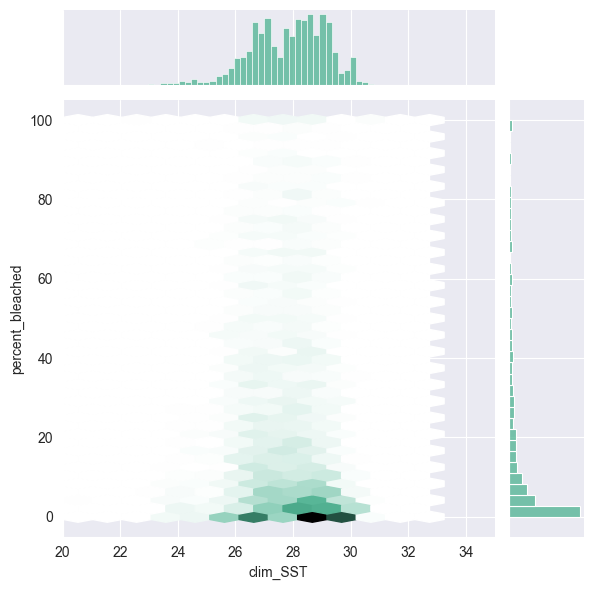

In [394]:
# sns.pairplot(train_dataset[['date', 'severity_code', 'depth_meters', 'temperature_mean', 'TSA', 'clim_SST', 'SSTA_DHW']], diag_kind='kde')
# a = sns.lmplot(
#     data=train_dataset,
#     x="SSTA_DHW", y="clim_SST", hue="severity_code",
#     height=5
# )
# b = sns.lmplot(
#   data=train_dataset,
#   x="SSTA_DHW", y="clim_SST", hue="severity_code",
#   height=5
# )
# c = sns.lmplot(
#   data=train_dataset,
#   x="date", y="temperature_mean", hue="severity_code",
#   height=5
# )
# sns.lineplot(x = "date", y = "severity_code", data = train_dataset)
# sns.lineplot(x = "date", y = "temperature_mean", data = train_dataset)
g = sns.jointplot(x='clim_SST', y='percent_bleached', data=train_dataset, kind="hex", color="#4CB391", xlim=(20, 35))


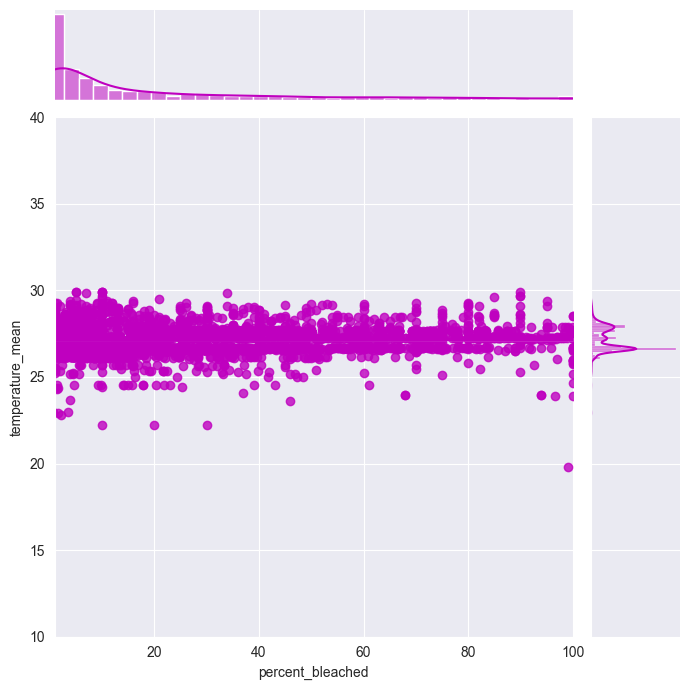

In [399]:
g = sns.jointplot(y="temperature_mean", x="percent_bleached", data=train_dataset,
                  kind="reg", truncate=False,
                  ylim=(10, 40), xlim=(1,100),
                  color="m", height=7)

/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

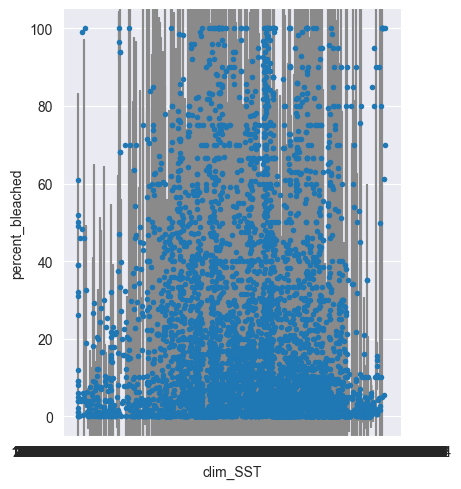

In [400]:
# g = sns.jointplot(x="severity_code", y="clim_SST", data=train_dataset,
#                   kind="reg", truncate=False,
#                   xlim=(0, 4), ylim=(10, 40),
#                   color="m", height=7)
sns.catplot(data=train_dataset, y="percent_bleached", x="clim_SST", kind="violin", color=".9", inner=None, split=True)
sns.swarmplot(data=train_dataset, y="percent_bleached", x="clim_SST", size=4)
g.set(xlim=(10, 35))

/Users/spencerromberg/Repos/ocean_data/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


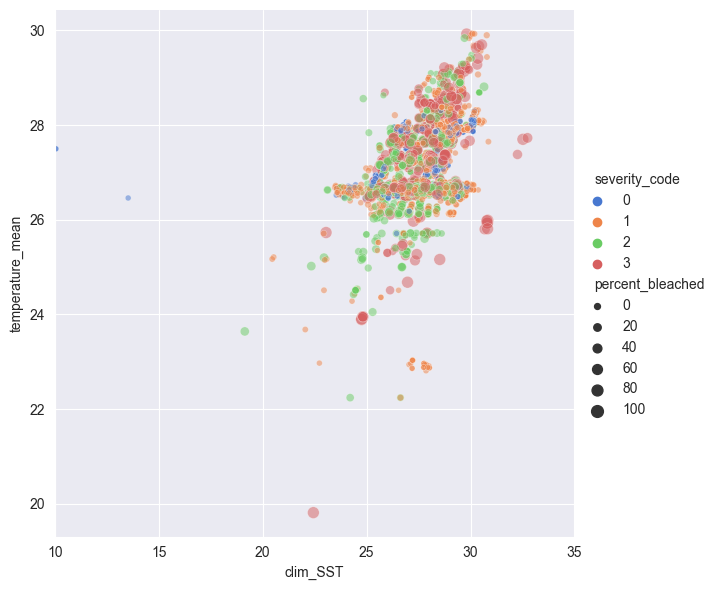

In [401]:
g = sns.relplot(x="clim_SST", y="temperature_mean", hue="severity_code", size="percent_bleached",
            alpha=.5, palette="muted",
            height=6, data=train_dataset)

g.set(xlim=(10, 35))


In [402]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('percent_bleached')
test_labels = test_features.pop('percent_bleached')

train_dataset.describe().transpose()
train_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


[[2005.975    7.167   27.684   27.153    0.       3.576   -0.749    1.856
     1.392]]


In [403]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[2007.     16.     27.97   26.55    0.      2.36    1.06    0.      2.  ]]

Normalized: [[ 0.21  1.6   0.11 -0.76  0.   -0.21  1.02 -0.36  0.66]]


In [404]:
clim_SST = np.array(train_features['clim_SST'])

clim_SST_normalizer = layers.Normalization(input_shape=[1,], axis=None)
clim_SST_normalizer.adapt(clim_SST)

clim_SST_model = tf.keras.Sequential([
    clim_SST_normalizer,
    layers.Dense(units=1)
])

clim_SST_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [405]:
clim_SST_model.predict(clim_SST[:10])


1/1 [==============================] - 0s 45ms/step


array([[-0.09 ],
       [ 0.077],
       [ 0.358],
       [-0.078],
       [-0.024],
       [-0.194],
       [-0.03 ],
       [ 0.235],
       [-0.109],
       [-0.415]], dtype=float32)

In [406]:
clim_SST_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [407]:
%%time
history = clim_SST_model.fit(
    train_features['clim_SST'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


CPU times: user 21.1 s, sys: 2.47 s, total: 23.6 s
Wall time: 18.4 s


In [408]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,val_loss,epoch
95,16.451494,16.166250,95
96,16.457739,16.173435,96
97,16.453131,16.166613,97
98,16.451181,16.172424,98
99,16.457115,16.162575,99


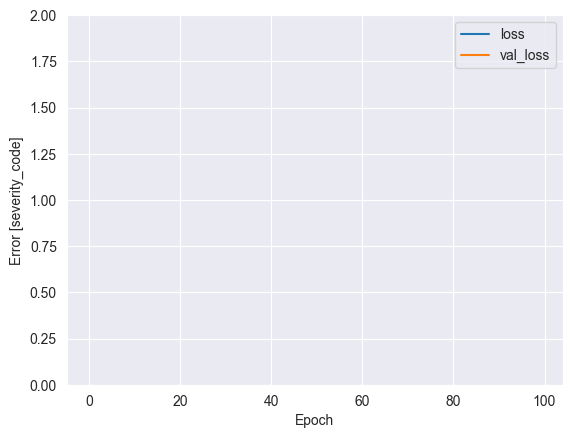

In [409]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [percent_bleached]')
  plt.legend()
  plt.grid(True)
plot_loss(history)


In [410]:
test_results = {}

test_results['clim_SST_model'] = clim_SST_model.evaluate(
    test_features['clim_SST'],
    test_labels, verbose=0)
x = tf.linspace(0.0, 250, 251)
y = clim_SST_model.predict(x)


8/8 [==============================] - 0s 2ms/step


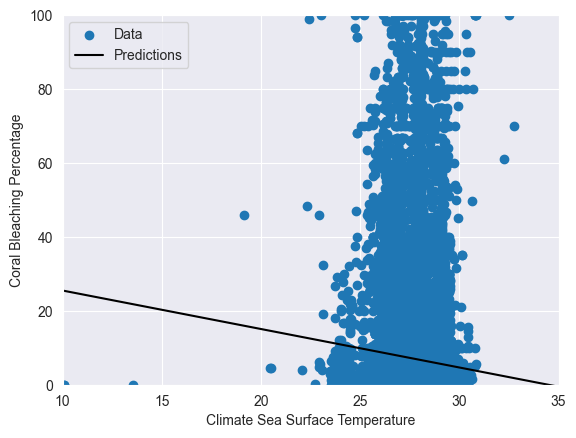

In [412]:
def plot_clim_SST(x, y):
  plt.scatter(train_features['clim_SST'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Climate Sea Surface Temperature')
  plt.ylabel('Coral Bleaching Percentage')
  plt.xlim([10, 35])
  plt.ylim([0, 100])
  plt.legend()
plot_clim_SST(x, y)


# Using Temp as the popped value

In [413]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('clim_SST')
test_labels = test_features.pop('clim_SST')

train_dataset.describe().transpose()
train_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())



[[2005.975   18.543    7.167   27.153    0.       3.576   -0.749    1.856
     1.392]]


In [414]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

percent_bleached = np.array(train_features['percent_bleached'])

percent_bleached_normalizer = layers.Normalization(input_shape=[1,], axis=None)
percent_bleached_normalizer.adapt(percent_bleached)

percent_bleached_model = tf.keras.Sequential([
    percent_bleached_normalizer,
    layers.Dense(units=1)
])

percent_bleached_model.summary()

First example: [[2007.     46.67   16.     26.55    0.      2.36    1.06    0.      2.  ]]

Normalized: [[ 0.21  1.15  1.6  -0.76  0.   -0.21  1.02 -0.36  0.66]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliz  (None, 1)                 3         
 ation)                                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [415]:
percent_bleached_model.predict(percent_bleached[:10])



1/1 [==============================] - 0s 44ms/step


array([[ 1.509],
       [-0.149],
       [ 0.296],
       [-0.727],
       [-0.957],
       [-0.494],
       [-0.724],
       [ 1.241],
       [ 3.136],
       [ 1.151]], dtype=float32)

In [418]:
percent_bleached_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error')

In [419]:

%%time
history = percent_bleached_model.fit(
  train_features['percent_bleached'],
  train_labels,
  epochs=100,
  # Suppress logging.
  verbose=0,
  # Calculate validation results on 20% of the training data.
  validation_split=0.2)

CPU times: user 19.7 s, sys: 2.25 s, total: 21.9 s
Wall time: 17.4 s


In [420]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.222125,1.170032,95
96,1.220091,1.180440,96
97,1.224048,1.177942,97
98,1.226569,1.170677,98
99,1.222490,1.173416,99


8/8 [==============================] - 0s 948us/step


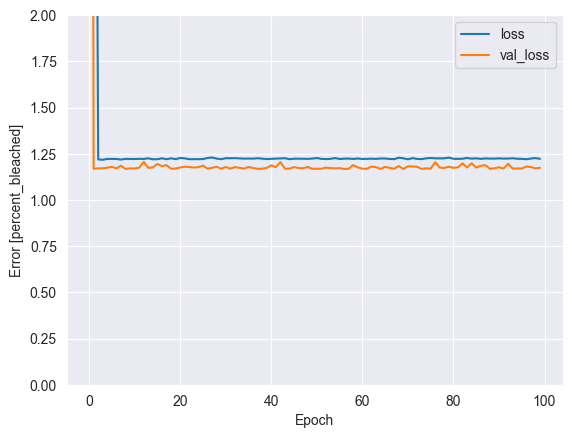

In [421]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [percent_bleached]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

test_results = {}

test_results['percent_bleached_model'] = percent_bleached_model.evaluate(
    test_features['percent_bleached'],
    test_labels, verbose=0)
x = tf.linspace(0.0, 250, 251)
y = percent_bleached_model.predict(x)

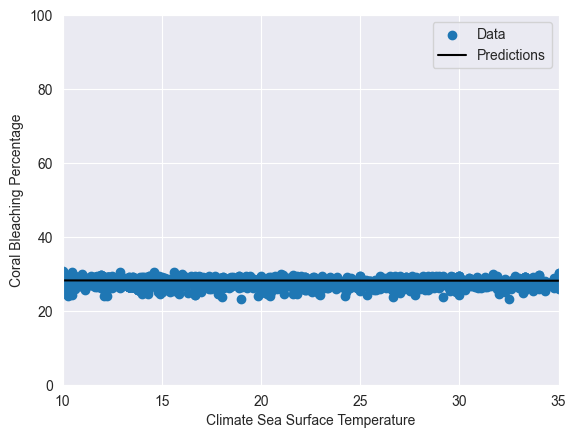

In [422]:
def plot_percent_bleached(x, y):
  plt.scatter(train_features['percent_bleached'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Climate Sea Surface Temperature')
  plt.ylabel('Coral Bleaching Percentage')
  plt.xlim([10, 35])
  plt.ylim([0, 100])
  plt.legend()
plot_percent_bleached(x, y)